In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('Data_Sets/dataset.csv')

In [6]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,65,1,1,1,2,2,1,2,2,2,2,2,2,1,NO
1,F,55,1,2,2,1,1,2,2,2,1,1,1,2,2,NO
2,F,78,2,2,1,1,1,2,1,2,1,1,2,1,1,YES
3,M,60,2,1,1,1,2,1,2,1,1,2,1,2,2,YES
4,F,80,1,1,2,1,1,2,1,2,1,1,1,1,2,NO


In [7]:
df.shape

(3000, 16)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 3000 non-null   object
 1   AGE                    3000 non-null   int64 
 2   SMOKING                3000 non-null   int64 
 3   YELLOW_FINGERS         3000 non-null   int64 
 4   ANXIETY                3000 non-null   int64 
 5   PEER_PRESSURE          3000 non-null   int64 
 6   CHRONIC_DISEASE        3000 non-null   int64 
 7   FATIGUE                3000 non-null   int64 
 8   ALLERGY                3000 non-null   int64 
 9   WHEEZING               3000 non-null   int64 
 10  ALCOHOL_CONSUMING      3000 non-null   int64 
 11  COUGHING               3000 non-null   int64 
 12  SHORTNESS_OF_BREATH    3000 non-null   int64 
 13  SWALLOWING_DIFFICULTY  3000 non-null   int64 
 14  CHEST_PAIN             3000 non-null   int64 
 15  LUNG_CANCER          

In [9]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,55.169000,1.491000,1.514000,1.494000,1.499000,1.509667,1.489667,1.506667,1.497333,1.491333,1.510667,1.488000,1.489667,1.498667
std,14.723746,0.500002,0.499887,0.500047,0.500082,0.499990,0.499977,0.500039,0.500076,0.500008,0.499970,0.499939,0.499977,0.500082
min,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,42.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,55.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000
75%,68.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,80.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [10]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC_DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL_CONSUMING        0
COUGHING                 0
SHORTNESS_OF_BREATH      0
SWALLOWING_DIFFICULTY    0
CHEST_PAIN               0
LUNG_CANCER              0
dtype: int64

# LISTING THE CATEGORICAL AND THE NUMERICAL COLUMNS

In [11]:
categorical_columns=df.select_dtypes(include=['category','object']).columns
numerical_columns=df.select_dtypes(exclude=['category','object']).columns

In [14]:
df['GENDER'].value_counts()

GENDER
M    1514
F    1486
Name: count, dtype: int64

In [15]:
df['GENDER'].value_counts('LUNG_CANCER')

GENDER
M    0.504667
F    0.495333
Name: proportion, dtype: float64

In [17]:
import scipy.stats as stats

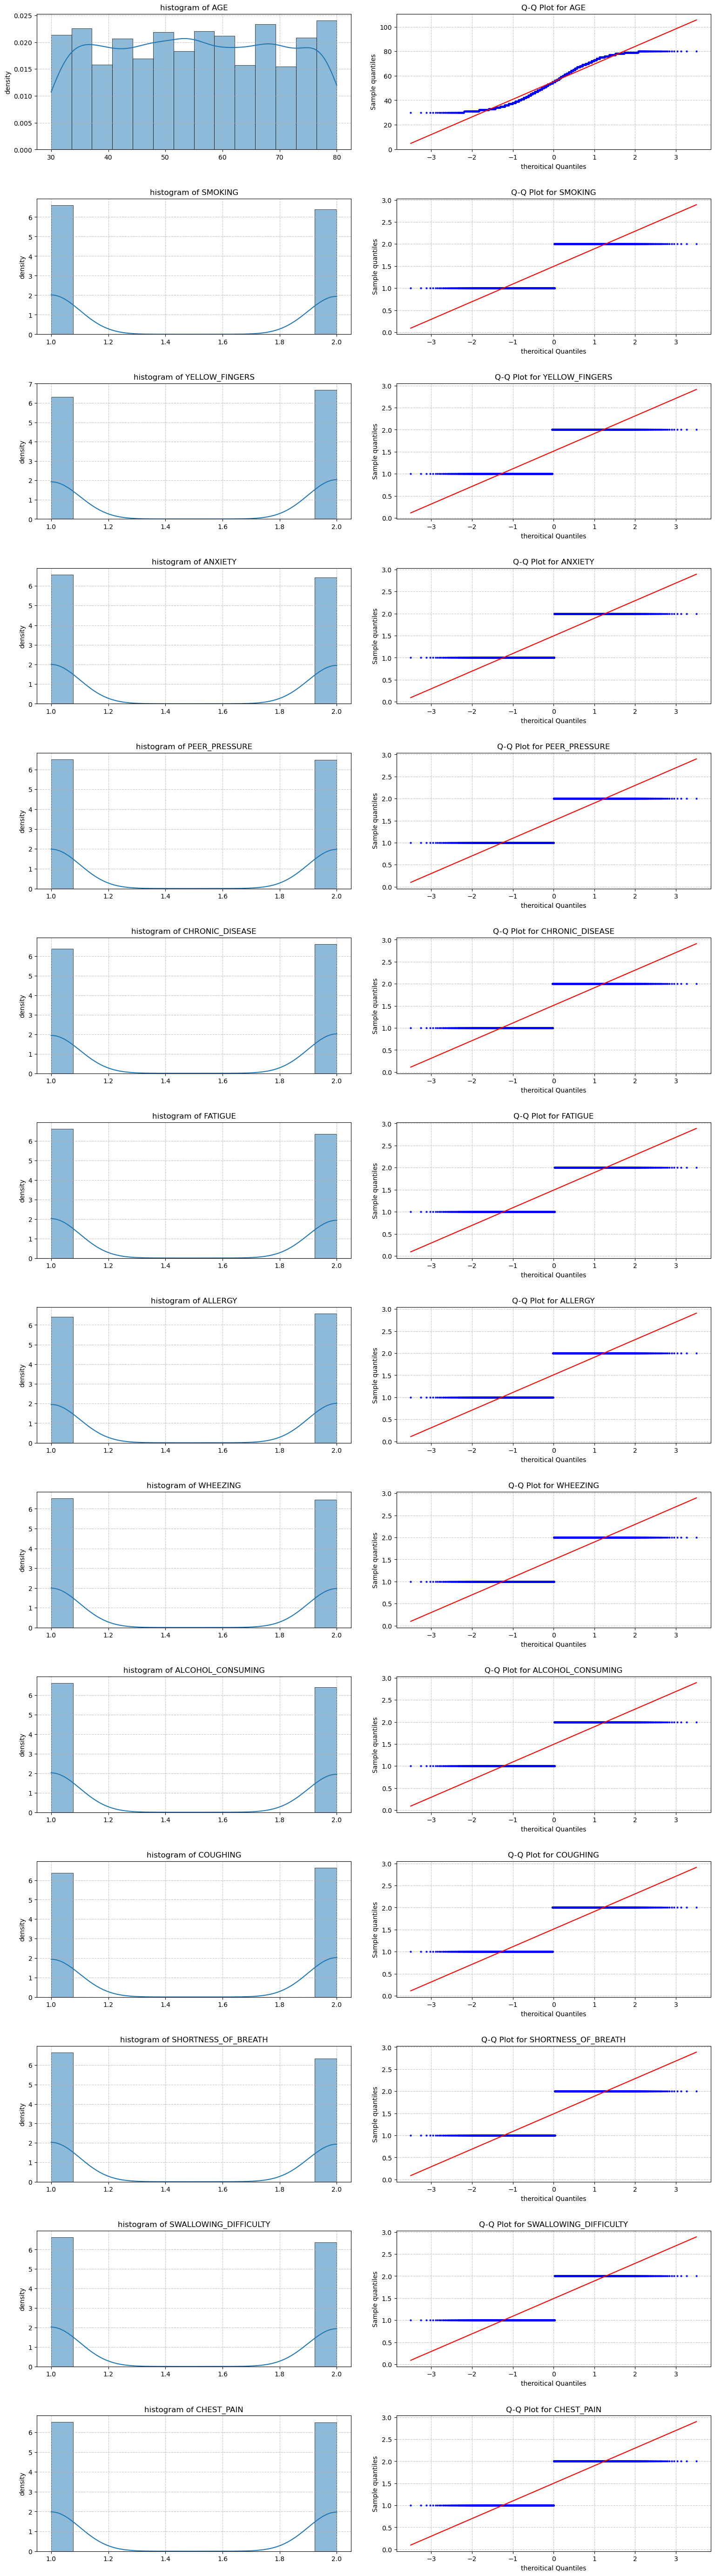

In [18]:
#create a figure and axes for subplots
num_cols = len(numerical_columns)
fig, axes = plt.subplots(num_cols, 2, figsize=(16, num_cols*4))

#plotting histograms and Q-Q plots for each umerical column
for i,col in enumerate(numerical_columns):
    #histogram on the left subplot
    sns.histplot(df[col],kde=True ,ax=axes[i,0], stat='density', linewidth = 0.5)
    axes[i , 0].set_title(f'histogram of {col}') 
    axes[i,0].set_xlabel('')
    axes[i,0].set_ylabel('density')
    axes[i,0].grid(True, linestyle='--',alpha=0.7)

    #Q-Q plot on the right subplot
    stats.probplot(df[col], plot=axes[i,1], dist='norm', fit=True)
    axes[i,1].get_lines()[0].set_markersize(2.0) # adjust marker size for clarity
    axes[i,1].grid(True, linestyle='--',alpha=0.7)
    axes[i,1].set_title(f'Q-Q Plot for {col}')
    axes[i,1].set_xlabel('theroitical Quantiles')
    axes[i,1].set_ylabel('Sample quantiles')

#adjust layout and display display the plots
plt.tight_layout(pad=3.0)
plt.show()

In [19]:
from scipy.stats import anderson, jarque_bera, shapiro,normaltest,kstest
from statsmodels.stats.diagnostic import lilliefors 

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import anderson, jarque_bera, shapiro,normaltest,kstest
from statsmodels.stats.diagnostic import lilliefors  # Corrected import


# Function to perform normality tests
def test_normality(df, col):
    print(f'Column: {col}')
    
    # Shapiro-Wilk test
    stat_shapiro, p_shapiro = shapiro(df[col])
    print(f'Shapiro-Wilk Test: Statistics={stat_shapiro:.3f}, p-value={p_shapiro:.3f}')
    if p_shapiro > 0.05:
        print(f'Shapiro-Wilk Test: {col} looks normally distributed (fail to reject H0)')
    else:
        print(f'Shapiro-Wilk Test: {col} does not look normally distributed (reject H0)')
    
    # Anderson-Darling test
    result_anderson = anderson(df[col])
    print(f'Anderson-Darling Test: Statistics={result_anderson.statistic:.3f}')
    print(f'Anderson-Darling Test: Critical Values: {result_anderson.critical_values}')
    if result_anderson.statistic < result_anderson.critical_values[2]:
        print(f'Anderson-Darling Test: {col} looks normally distributed (fail to reject H0)')
    else:
        print(f'Anderson-Darling Test: {col} does not look normally distributed (reject H0)')
    
    # Jarque-Bera test
    jb_stat, p_val_jb = jarque_bera(df[col])
    print(f'Jarque-Bera Test: JB statistic={jb_stat:.3f}, p-value={p_val_jb:.3f}')
    if p_val_jb > 0.05:
        print(f'Jarque-Bera Test: {col} looks normally distributed (fail to reject H0)')
    else:
        print(f'Jarque-Bera Test: {col} does not look normally distributed (reject H0)')


# D'Agostino and Pearson's test
    stat_agostino, p_agostino = normaltest(df[col])
    print(f"D'Agostino and Pearson's Test: Statistics={stat_agostino:.3f}, p-value={p_agostino:.3f}")
    if p_agostino > 0.05:
        print(f"D'Agostino and Pearson's Test: {col} looks normally distributed (fail to reject H0)")
    else:
        print(f"D'Agostino and Pearson's Test: {col} does not look normally distributed (reject H0)")
    
    # Kolmogorov-Smirnov test
    ks_stat, p_ks = kstest(df[col], 'norm')
    print(f'Kolmogorov-Smirnov Test: KS statistic={ks_stat:.3f}, p-value={p_ks:.3f}')
    if p_ks > 0.05:
        print(f'Kolmogorov-Smirnov Test: {col} looks normally distributed (fail to reject H0)')
    else:
        print(f'Kolmogorov-Smirnov Test: {col} does not look normally distributed (reject H0)')
    
    # Lilliefors test
    stat_lilliefors, p_lilliefors = lilliefors(df[col])
    print(f'Lilliefors Test: Statistics={stat_lilliefors:.3f}, p-value={p_lilliefors:.3f}')
    if p_lilliefors > 0.05:
        print(f'Lilliefors Test: {col} looks normally distributed (fail to reject H0)')
    else:
        print(f'Lilliefors Test: {col} does not look normally distributed (reject H0)')
    
    print('\n')


# Perform normality tests for each numerical column
for col in numerical_columns:
    test_normality(df, col)

Column: AGE
Shapiro-Wilk Test: Statistics=0.954, p-value=0.000
Shapiro-Wilk Test: AGE does not look normally distributed (reject H0)
Anderson-Darling Test: Statistics=33.513
Anderson-Darling Test: Critical Values: [0.575 0.655 0.786 0.917 1.091]
Anderson-Darling Test: AGE does not look normally distributed (reject H0)
Jarque-Bera Test: JB statistic=178.445, p-value=0.000
Jarque-Bera Test: AGE does not look normally distributed (reject H0)
D'Agostino and Pearson's Test: Statistics=2377.569, p-value=0.000
D'Agostino and Pearson's Test: AGE does not look normally distributed (reject H0)
Kolmogorov-Smirnov Test: KS statistic=1.000, p-value=0.000
Kolmogorov-Smirnov Test: AGE does not look normally distributed (reject H0)
Lilliefors Test: Statistics=0.072, p-value=0.001
Lilliefors Test: AGE does not look normally distributed (reject H0)


Column: SMOKING
Shapiro-Wilk Test: Statistics=0.637, p-value=0.000
Shapiro-Wilk Test: SMOKING does not look normally distributed (reject H0)
Anderson-Darli

# FINDING OUTLIERS USING IQR

In [21]:
def find_outliers_iqr(data):
    outliers_mask=pd.Series(index=data.columns,dtype=bool)
    for col in data.columns:
        if col in numerical_columns: #Process only numerical columns
            Q1=data[col].quantile(0.25)
            Q3=data[col].quantile(0.75)
            IQR=Q3-Q1
            lower_bound=Q1-1.5*IQR
            upper_bound=Q1+1.5*IQR
            col_outliers_mask=(data[col]<lower_bound)|(data[col]>upper_bound)
            outliers_mask[col]=col_outliers_mask.any() #True if any outliers detected
    return outliers_mask

outliers_iqr_mask=find_outliers_iqr(df)
print("Outliers detected using IQR method: ")
for col, is_outlier in outliers_iqr_mask.items():
    print(f"{col}:{is_outlier}")

Outliers detected using IQR method: 
GENDER:True
AGE:False
SMOKING:False
YELLOW_FINGERS:False
ANXIETY:False
PEER_PRESSURE:False
CHRONIC_DISEASE:False
FATIGUE:False
ALLERGY:False
WHEEZING:False
ALCOHOL_CONSUMING:False
COUGHING:False
SHORTNESS_OF_BREATH:False
SWALLOWING_DIFFICULTY:False
CHEST_PAIN:False
LUNG_CANCER:True


REMOVING OUTLIERS USING IQR METHOD

In [22]:
def remove_outliers_iqr(data):
    cleaned_data = data.copy()

    for col in data.columns:
        if col in numerical_columns:  # Process only numerical columns
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            cleaned_data = cleaned_data[(cleaned_data[col] >= lower_bound) & (cleaned_data[col] <= upper_bound)]

    return cleaned_data

cleaned_data_iqr = remove_outliers_iqr(df)
print("DataFrame after removing outliers using IQR method:")
print(cleaned_data_iqr)

DataFrame after removing outliers using IQR method:
     GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0         M   65        1               1        1              2   
1         F   55        1               2        2              1   
2         F   78        2               2        1              1   
3         M   60        2               1        1              1   
4         F   80        1               1        2              1   
...     ...  ...      ...             ...      ...            ...   
2995      F   71        2               1        1              2   
2996      F   75        1               2        1              1   
2997      F   62        2               2        2              1   
2998      M   30        1               1        2              2   
2999      M   40        1               2        2              1   

      CHRONIC_DISEASE  FATIGUE  ALLERGY  WHEEZING  ALCOHOL_CONSUMING  \
0                   2        1        2        

# VISUALIZATION OF DATA USING CORRELATION MATRIX

In [23]:
numeric_data=df[numerical_columns]
# Compute pairwise correlation of numeric columns
correlation_matrix=numeric_data.corr()


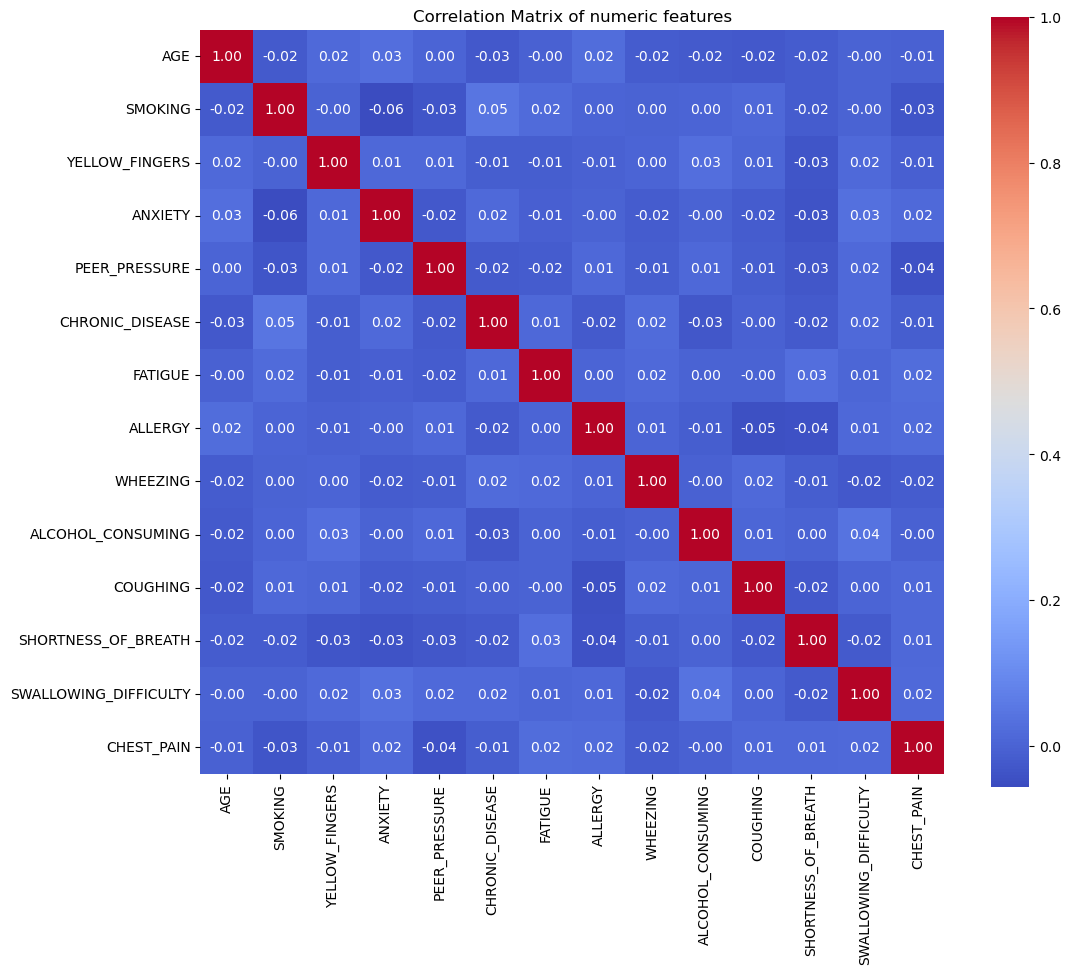

In [25]:
#plotting correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt=".2f",square=True)
plt.title('Correlation Matrix of numeric features')
plt.show()

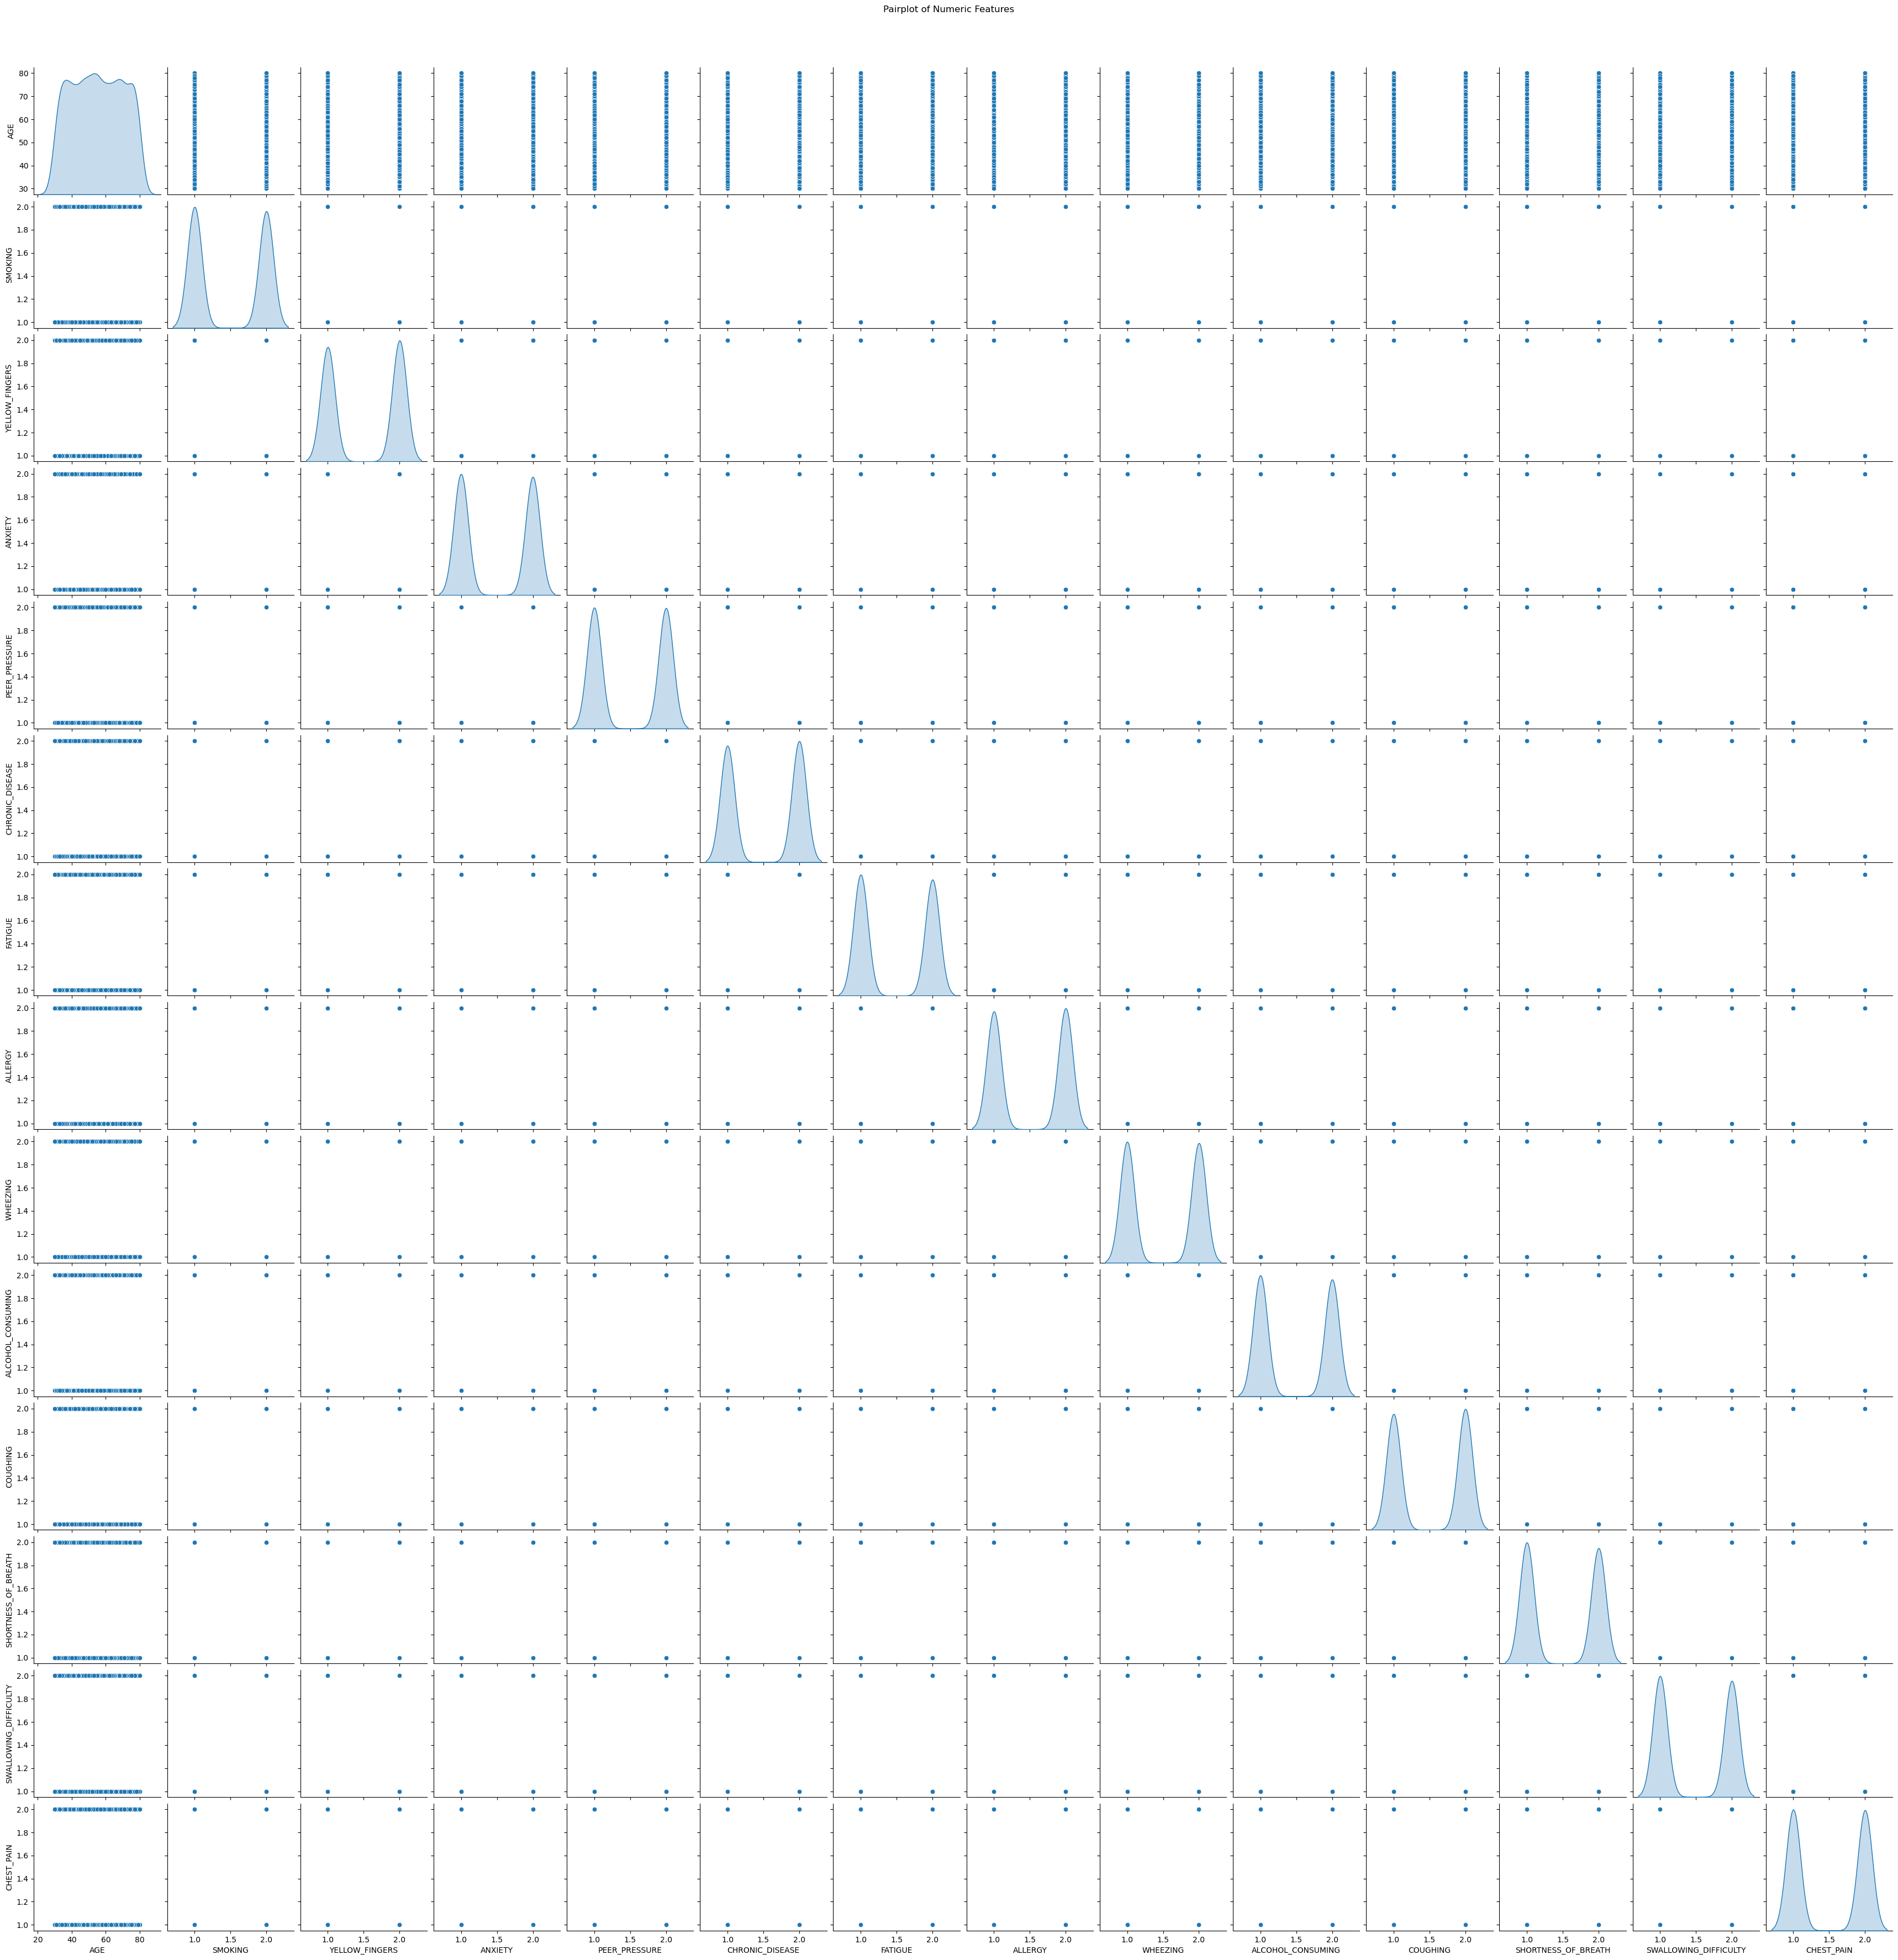

In [26]:
# Pairplot of numeric features
sns.pairplot(df[numerical_columns],diag_kind='kde')
plt.suptitle('Pairplot of Numeric Features',y=1.02)
plt.show()

In [27]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,65,1,1,1,2,2,1,2,2,2,2,2,2,1,NO
1,F,55,1,2,2,1,1,2,2,2,1,1,1,2,2,NO
2,F,78,2,2,1,1,1,2,1,2,1,1,2,1,1,YES
3,M,60,2,1,1,1,2,1,2,1,1,2,1,2,2,YES
4,F,80,1,1,2,1,1,2,1,2,1,1,1,1,2,NO


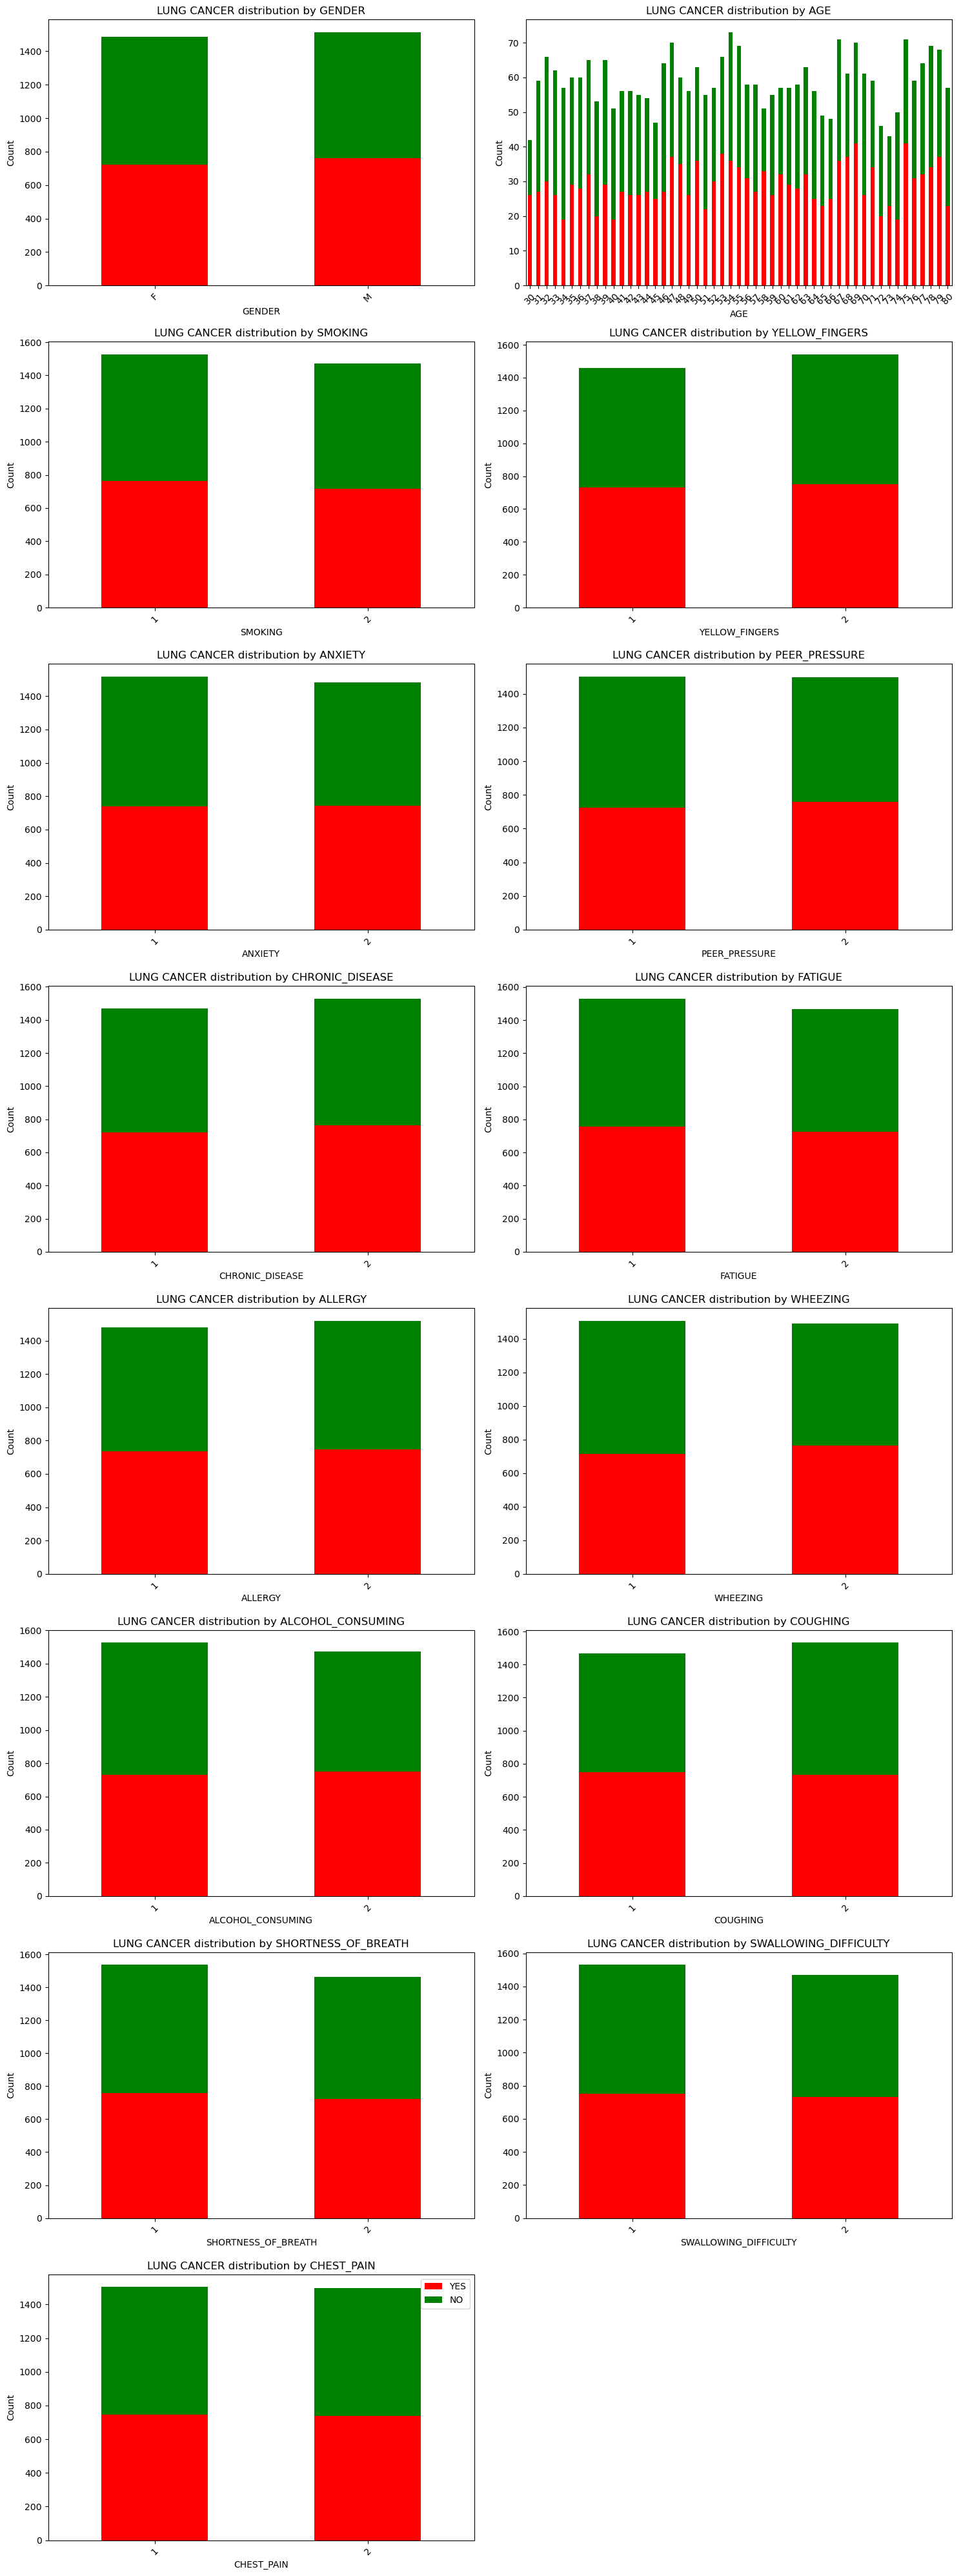

In [30]:
import matplotlib.pyplot as plt
import pandas as pd



# Exclude columns that are not needed for plotting
columns_to_plot = [col for col in df.columns if col not in ['LUNG_CANCER']]

# Calculate number of rows and columns for subplot grid
num_cols = 2  # Number of columns in subplot layout
num_rows = (len(columns_to_plot) + 1) // num_cols  # Calculate number of rows needed

# Adjust figure size based on number of subplots
fig_width = 15
fig_height = num_rows * 5  # Adjust height based on number of rows

plt.figure(figsize=(fig_width, fig_height))

# Iterate through each column and plot
for i, col in enumerate(columns_to_plot):
    plt.subplot(num_rows, num_cols, i + 1)
    LUNG_CANCER_cross = pd.crosstab(index=df[col], columns=df['LUNG_CANCER'])
    LUNG_CANCER_cross.plot(kind='bar', stacked=True, color=['red', 'green'], ax=plt.gca(), legend=None)
    plt.title(f'LUNG CANCER distribution by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(False)
    plt.tight_layout(pad=3.0)  # Adjust spacing between subplots

# Adjust layout and display the plot
plt.tight_layout()
plt.legend(['YES', 'NO'], loc='upper right')
plt.show() 

In [31]:
df.to_csv('Data_Sets/filtered_data.csv',index=False)

In [32]:
import pandas as pd
data=pd.read_csv('Data_Sets/filtered_data.csv')
data.head(60)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,65,1,1,1,2,2,1,2,2,2,2,2,2,1,NO
1,F,55,1,2,2,1,1,2,2,2,1,1,1,2,2,NO
2,F,78,2,2,1,1,1,2,1,2,1,1,2,1,1,YES
3,M,60,2,1,1,1,2,1,2,1,1,2,1,2,2,YES
4,F,80,1,1,2,1,1,2,1,2,1,1,1,1,2,NO
5,F,58,1,1,1,2,2,2,2,1,2,2,1,1,2,YES
6,F,70,1,1,1,2,2,1,2,2,2,2,2,2,1,YES
7,F,74,2,2,1,1,1,1,2,1,1,1,1,2,1,NO
8,M,77,1,2,1,2,1,1,1,1,2,1,1,1,2,NO
9,F,67,2,2,2,2,1,2,2,1,2,1,2,1,1,NO


In [33]:
#display the first few rows and all columns
pd.set_option('display.max_columns',None) #
print("First few rows of data: ")
print(data.head())

First few rows of data: 
  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   65        1               1        1              2   
1      F   55        1               2        2              1   
2      F   78        2               2        1              1   
3      M   60        2               1        1              1   
4      F   80        1               1        2              1   

   CHRONIC_DISEASE  FATIGUE  ALLERGY  WHEEZING  ALCOHOL_CONSUMING  COUGHING  \
0                2        1        2         2                  2         2   
1                1        2        2         2                  1         1   
2                1        2        1         2                  1         1   
3                2        1        2         1                  1         2   
4                1        2        1         2                  1         1   

   SHORTNESS_OF_BREATH  SWALLOWING_DIFFICULTY  CHEST_PAIN LUNG_CANCER  
0                    2         

In [34]:
numerical_cols=data.select_dtypes(exclude=['category','object']).columns
category_cols=data.select_dtypes(include=['category','object']).columns
numerical_cols

Index(['AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
       'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
       'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH',
       'SWALLOWING_DIFFICULTY', 'CHEST_PAIN'],
      dtype='object')

In [35]:
category_cols

Index(['GENDER', 'LUNG_CANCER'], dtype='object')

In [36]:
#Drop numerical columns from data
data_categorical=data.drop(columns=numerical_cols)
#Perform one-hot encoding on categorical columns
encoded_data=pd.get_dummies(data_categorical, columns=['GENDER', 'LUNG_CANCER'])
encoded_data.head()

,GENDER_F,GENDER_M,LUNG_CANCER_NO,LUNG_CANCER_YES
0,False,True,True,False
1,True,False,True,False
2,True,False,False,True
3,False,True,False,True
4,True,False,True,False


In [37]:
pip install Scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
